# Mean filters

This example compares the following mean filters of the `rank` filter package:

### local mean: 
all pixels belonging to the structuring element to compute average gray level.
### percentile mean: 
only use values between percentiles p0 and p1 (here 20% and 80%).
### bilateral mean: 
only use pixels of the structuring element having a gray level situated inside g-s0 and g+s1 (here g-200 and g+200)

Percentile and usual mean give here similar results, these filters smooth the complete image (background and details). Bilateral mean exhibits a high filtering rate for continuous area (i.e. background) while higher image frequencies remain untouched.

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.morphology import disk
from skimage.filters import rank

### Load

In [2]:
image = data.coins()
selem = disk(20)

### Mean filters

In [5]:
percentile_result = rank.mean_percentile(image, selem=selem, p0=.2, p1=.8)
bilateral_result = rank.mean_bilateral(image, selem=selem, s0=200, s1=200)
normal_result = rank.mean(image, selem=selem)

### Show

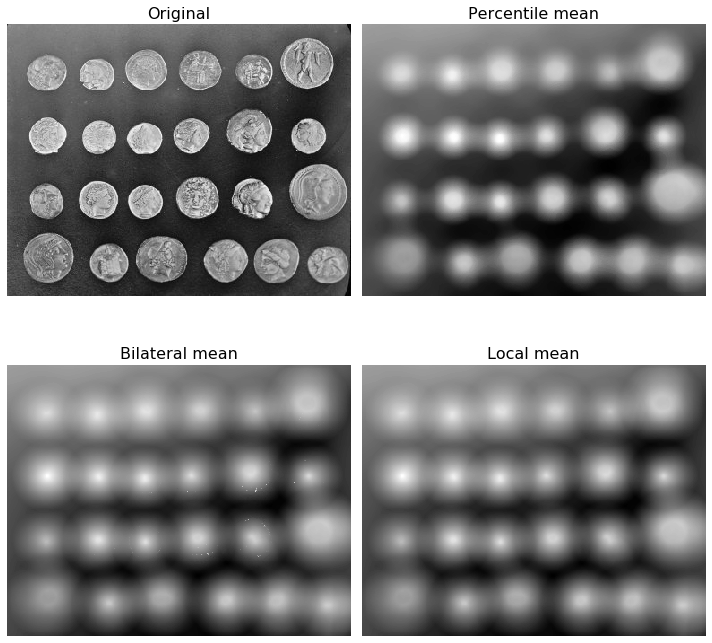

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
imgs = [image, percentile_result, bilateral_result, normal_result]
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n],fontsize=16)
    ax[n].axis('off')

plt.tight_layout()
plt.show()